In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc

HEIGHT=48
WIDTH=24
CLASSNUMBER = 32
RESIZED_HEIGHT = 160
RESIZED_WIDTH = 80
DATASETNUMBER=1
# TRAIN_IMAGE_NUMBER =
# TEST_IMAGE_NUMBER = 
# VALIDATION_IMAGE_NUMBER = 


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    image_name=[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
            image_name.append(str(f))
    return images, labels,image_name

In [3]:
size_of_name = str(HEIGHT)+'*'+str(WIDTH)
ROOT_PATH = '/home/tang/targa/exp4/trainingOriginal/lightTransformation/splitLightData/'+str(DATASETNUMBER)+'SplitDataset/'+size_of_name
load_train_data_directory = os.path.join(ROOT_PATH, "train")
load_test_data_directory = os.path.join(ROOT_PATH, "test")
load_validation_data_directory = os.path.join(ROOT_PATH, "validation")


In [4]:
load_test_data_directory

'/home/tang/targa/exp4/trainingOriginal/lightTransformation/splitLightData/1SplitDataset/48*24/test'

In [5]:
PAD_PATH='/home/tang/targa/exp4/lightPadding/splitTenDatasetPadding/'+str(DATASETNUMBER)+'splitDatasetPadding/'+size_of_name

In [6]:
if not os.path.exists(PAD_PATH):
    os.makedirs(PAD_PATH)

In [7]:
padding_train_data_directory = os.path.join(PAD_PATH, "train")
padding_test_data_directory = os.path.join(PAD_PATH, "test")
padding_validation_data_directory = os.path.join(PAD_PATH, "validation")

In [8]:
if not os.path.exists(padding_train_data_directory):
    os.makedirs(padding_train_data_directory)
if not os.path.exists(padding_test_data_directory):
    os.makedirs(padding_test_data_directory)
if not os.path.exists(padding_validation_data_directory):
    os.makedirs(padding_validation_data_directory)

In [9]:
trainImages,trainLabels,trainImageNames = load_data(load_train_data_directory)
testImages,testLabels,testImageNames = load_data(load_test_data_directory)
validationImages,validationLabels,validationImageNames=load_data(load_validation_data_directory)

In [10]:
print('train images length:\t\t{}'.format(len(trainImages)))

print('test images length:\t\t{}'.format(len(testImages)))
print('validation images length:\t\t{}'.format(len(validationImages)))


train images length:		18046
test images length:		2255
validation images length:		2257


In [11]:
#########make label directory
for i in trainLabels:
    trainlabels_directory = os.path.join(padding_train_data_directory, i)
    testlabels_directory = os.path.join(padding_test_data_directory, i)
    validationlabels_directory = os.path.join(padding_validation_data_directory, i)
    if not os.path.exists(trainlabels_directory):
        os.makedirs(trainlabels_directory)
    if not os.path.exists(testlabels_directory):
        os.makedirs(testlabels_directory)
    if not os.path.exists(validationlabels_directory):
        os.makedirs(validationlabels_directory)
    

In [12]:
from PIL import Image, ImageOps

top, bottom = [int((RESIZED_HEIGHT-HEIGHT)/2)]*2
left, right = [int((RESIZED_WIDTH-WIDTH)/2)]*2

color = [0,0,0]


In [13]:
top,left

(56, 28)

In [14]:
i=0
for p in range(0,len(trainImages)):
    
    img = trainImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=padding_train_data_directory+ '/' + trainLabels[i] + '/' + os.path.basename(trainImageNames[int(i)])
    plt.imsave(filename, img_with_border)
    #print(filename)
    i+=1

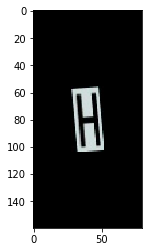

In [15]:
plt.imshow(img_with_border)

In [16]:
img_with_border.shape

(160, 80, 3)

In [17]:
i=0
for p in range(0,len(testImages)):
    
    img = testImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=padding_test_data_directory+ '/' + testLabels[i] + '/' + os.path.basename(testImageNames[int(i)])
    plt.imsave(filename, img_with_border)
    #print(filename)
    i+=1

In [18]:
i=0
for p in range(0,len(validationImages)):
    
    img = validationImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=padding_validation_data_directory+ '/' + validationLabels[i] + '/' + os.path.basename(validationImageNames[int(i)])
    plt.imsave(filename, img_with_border)
    #print(filename)
    i+=1

In [19]:
i

2257